# **APRENDIZAJE AUTOMATICO - TP 2** 💻

> 🙋🏻‍♂️ **Juan Andres Garcia Alves de Borba** (DNI 30182100)

## Indicaciones básicas


1. Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

2. Cada uno debe completar las consignas indicadas en este notebook.

3. No pueden repetir el mismo dataset que ya haya definido un compañero.

4. Copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5. No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6. Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7. Revise las fecha límite de entrega de este trabajo

## Entrega

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


</br>  
# **Tarea: Aplicación de Clustering y Reducción de Dimensionalidad**  

**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

## 📌 Punto 1. **Selección del Dataset**

### 🎯 Consignas:

- Elijan un dataset de UCI ML Repository del siguiente enlace:  
https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=

- Requisitos:  
  - Debe tener al menos 4 variables numéricas continuas.  
  - Idealmente, que las features tengan distintas escalas o unidades (no excluyente).
  - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
  - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.

### 📝 Resolución:

👉🏻 Me basaré en el dataset **Travel Reviews**.  

---

> https://archive.ics.uci.edu/dataset/484/travel+reviews.

👉🏻 Instalaciones ...

In [2]:
!pip install ucimlrepo

👉🏻 Importación de librerías y configuraciones generales ...

In [3]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# mayor ancho en los 'print()' antes que se generen saltos de línea
np.set_printoptions(linewidth=130)                # saltos de línea (otra opción: linewidth=np.inf)
np.set_printoptions(edgeitems=100)                # mostrar más elementos al principio y final
np.set_printoptions(threshold=np.inf)             # ancho para los arrays (otra opción: np.inf)
pd.set_option('display.width', 200)               # pandas: ancho total permitido
pd.set_option('display.max_columns', None)        # pandas: mostrar todas las columnas
np.set_printoptions(precision=4, suppress=True)   # 4 decimales en lugar de notación científica

👉🏻 Cargar el dataset ...

In [4]:
# fetch del dataset
travel_reviews = fetch_ucirepo(id=484)

👉🏻 Visualizar las descripciones de cada columna...

In [5]:
# información de los datos
print(travel_reviews.variables)
# print(travel_reviews.metadata)

           name     role         type demographic                                      description units missing_values
0       User ID       ID  Categorical        None                                             None  None             no
1    Category 1  Feature   Continuous        None           Average user feedback on art galleries  None             no
2    Category 2  Feature   Continuous        None             Average user feedback on dance clubs  None             no
3    Category 3  Feature   Continuous        None              Average user feedback on juice bars  None             no
4    Category 4  Feature   Continuous        None             Average user feedback on restaurants  None             no
5    Category 5  Feature   Continuous        None                 Average user feedback on museums  None             no
6    Category 6  Feature   Continuous        None                 Average user feedback on resorts  None             no
7    Category 7  Feature   Continuous   

👉🏻 Extraer los features ...

In [6]:
# variable 'X' para los features
x = travel_reviews.data.features

👉🏻 Inspección inicial ...

In [7]:
print("shape:", x.shape, '\n')  # tamaño de dataset
print(x.head(3), '\n')          # features (top 3)

shape: (980, 10) 

   Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  Category 7  Category 8  Category 9  Category 10
0        0.93         1.8        2.29        0.62        0.80        2.42        3.19        2.79        1.82         2.42
1        1.02         2.2        2.66        0.64        1.42        3.18        3.21        2.63        1.86         2.32
2        1.22         0.8        0.54        0.53        0.24        1.54        3.18        2.80        1.31         2.50 



👉🏻 Validación por nulos ...

In [8]:
# en lugar de hacer 'x.isnull().sum()', uso 'x.isnull().sum().values' que resulta más compacto de visualizar
print('nulos en el dataset:', x.isnull().sum().values)

nulos en el dataset: [0 0 0 0 0 0 0 0 0 0]


👉🏻 Validación por duplicados ...

In [9]:
print('duplicados en el dataset:', x.duplicated().sum())

# en caso que se quisiera eliminar los duplicados ...
# x = x.drop_duplicates()
# print("shape:", x.shape, '\n')  # nuevo tamaño de dataset

duplicados en el dataset: 39


> 👁️‍🗨️ En este dataset cada observación es la calificación de un usuario distinto sobre un sitio vacacional en particular, evaluándolo en los 10 aspectos (features) incluidos, con un rango del `0` (horrible) al `4` (excelente).

> 👁️‍🗨️ Resuelvo **no eliminar los duplicados**.

> 👁️‍🗨️ ¿Por qué? Considero válido (y hasta esperable) que sobre casi mil observaciones pueda haber usuarios distintos, que hayan utilizado la misma combinación al momento de calificar.

👉🏻 Columnas calculadas y conversión de formatos ...

In [10]:
# no aplica

👉🏻 Renombrar los features ...

In [11]:
# por simplicidad voy a renombrar las columnas ...
x.columns = ['Art Galleries', 'Dance Clubs', 'Juice Bars', 'Restaurants', 'Museums', 'Resorts', 'Parks-Picnic', 'Beaches', 'Theaters', 'Religious']
x.head(3)

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks-Picnic,Beaches,Theaters,Religious
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50


## 🔎 Punto 2. **Análisis Exploratorio de Datos**


### 🎯 Consignas:

- Describan las variables (media, distribución, outliers).  
- Visualizen:  
  - Histogramas o boxplots para ver distribuciones.  
  - Gráficos de dispersión (scatterplots) entre features y target.  
- Describan si observan o no relaciones entre algunas variables.

### 📝 Resolución:

👉🏻 Media, desviación estadar, mínimos y máximos ...

In [12]:
x.describe()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks-Picnic,Beaches,Theaters,Religious
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


👉🏻 Histogramas para ver las distribuciones ...

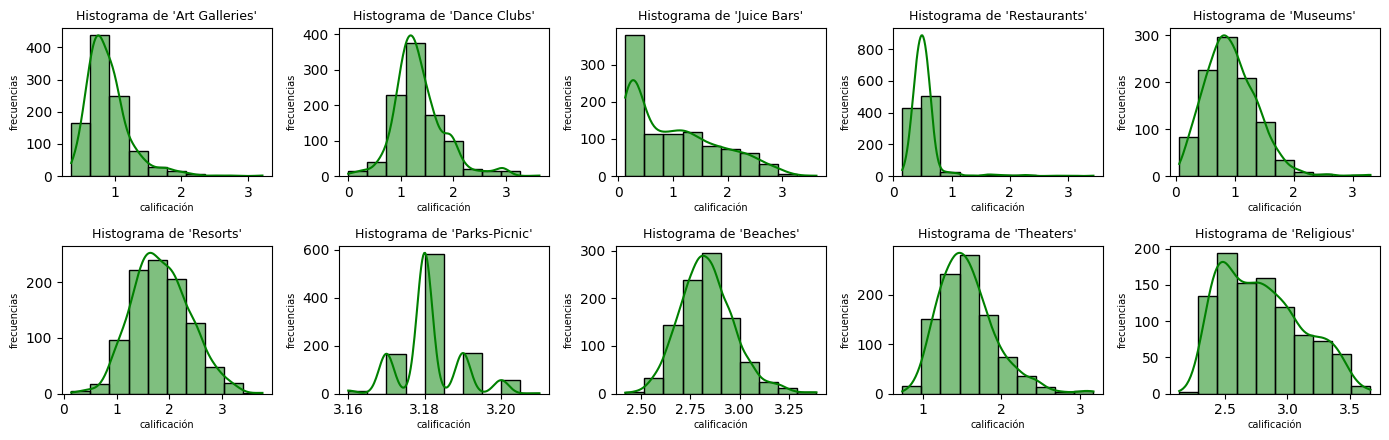

In [13]:
# primero los histogramas... uso un único gráfico para ver todo
plt.figure(figsize=(14, 4.5))                             # tamaño de la figura

# iterar sobre las columnas para dibujar un histograma para cada una
for i, col in enumerate(x.columns):
  plt.subplot(2, 5, i+1)                                  # 2 filas, 5 columnas, nro de sub-gráfico
  sns.histplot(x[col], kde=True, bins=10, color='green')  # histograma + KDE (estimación de densidad)
  plt.title(f"Histograma de '{ col }'", fontsize=9)       # título del gráfico
  plt.xlabel('calificación', fontsize=7, labelpad=2)      # etiqueta del eje x
  plt.ylabel('frecuencias', fontsize=7, labelpad=4)       # etiqueta del eje y
  plt.tight_layout()                                      # diseño compacto

plt.show()

> 👁️‍🗨️ Observo que la feature `Restaurants` (y `Juice Bars` en menor medida) tiene su distribución sumamente desbalanceada.  
La apunto para más adelante como candidata a descartar del análisis.

> 👁️‍🗨️ Observo que `Parks/Picnic` sobre un rango teórico de `0-4`, en las calificaciones varía solamente entre `3.16-3.21`.

> 👁️‍🗨️ Aunque la estandarización (vs normalización) funcione mejor con datos con distribución normal (que no es este caso)... tampoco me queda otra opción, dado que los algoritmos de clustering en gral asumen el uso de datos estandarizados.  

> La última observación esta basada en ChatGPT...  
`Prompt:` "Estandarización vs Normalización. Recomendación de uso para Clustering y porqué".

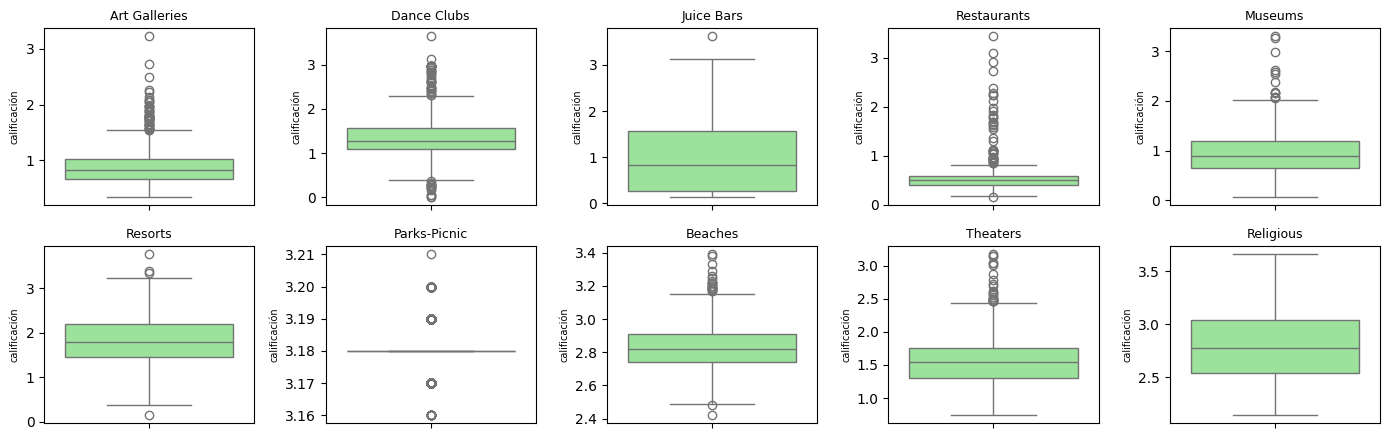

In [14]:
# luego los box-plot... uso un único gráfico para ver todo
plt.figure(figsize=(14, 4.5))                           # tamaño de la figura

# iterar sobre las columnas para dibujar un boxplot para cada una
for i, col in enumerate(x.columns):
  plt.subplot(2, 5, i+1)                                # 2 filas, 5 columnas, nro de sub-gráfico
  sns.boxplot(x[col], color='lightgreen')               # boxplot
  plt.title(f"{ col }", fontsize=9)                     # título
  plt.ylabel('calificación', fontsize=7, labelpad=4)    # etiqueta del eje y
  plt.tight_layout()                                    # diseño compacto

plt.show()

> 👁️‍🗨️ Ya de los histogramas se podía esperar que el feature `Parks-Picnic` presentara sus observaciones fuera de la caja (está visualizando un rango tan acotado que cualquier mínima variación excede fácilmente las 3 sigmas).

> 👁️‍🗨️ Algunos features como `Art Galeries`, `Dance Clubs`, `Restaurants`, `Museums`, `Beaches` y `Theaters` presentan muchos outliers. Hago un conteo a continuación ...

👉🏻 Búsqueda de Outliers (mediante z-score) ...

In [15]:
# calcular el z-score
z_scores = (x - x.mean()) / x.std()

# detectar outliers (3+ sigmas, 99% de los datos)
outliers = np.abs(z_scores) > 3
# print(outliers)

# contar filas con 1+ outliers
outliers_rows = outliers.any(axis=1).sum()

print('Filas con 1+ outliers: ', outliers_rows)
print('Detalle por feature:   ', outliers.sum().values)

Filas con 1+ outliers:  80
Detalle por feature:    [17 21  1 20  7  2  1  7 10  0]


> 👁️‍🗨️ Algunas features tienen bastantes outliers, en particular la `Art Galeries`, `Dance Clubs`, `Restaurants`.

> 👁️‍🗨️ Siendo que el dataset trae 980 observaciones, los 80 outliers representa un 8% del total.

👉🏻 Pruebo un PairPlot de Seaborn (visto en clase #05) como una primera aproximación de correlaciones entre los features ...

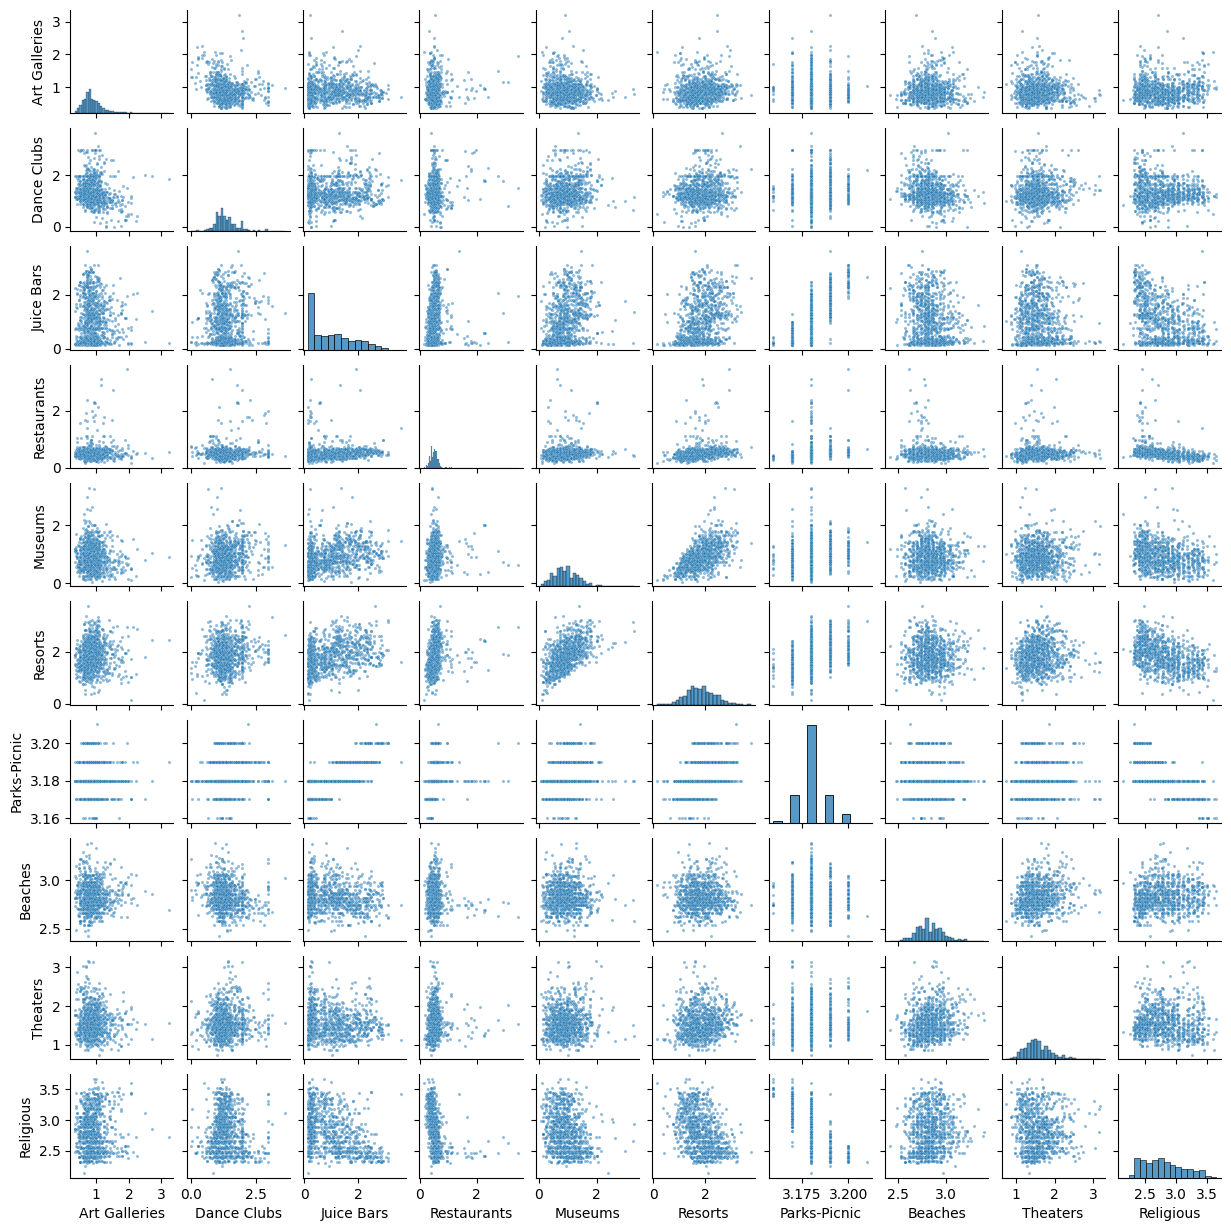

In [16]:
# muchos features para comparar ...
# 'height' es para achicar el tamaño de los sub-gráficos (reduciendo el scroll vertical)
# 'plot_kws' es para achicar el tamaño de los puntos y con 0.5 de transparecia.
sns.pairplot(x, height=1.25, plot_kws={'s': 5, 'alpha': 0.5})
plt.show()

👉🏻 A ver en un mapa de calor (visto en clase #02) ...

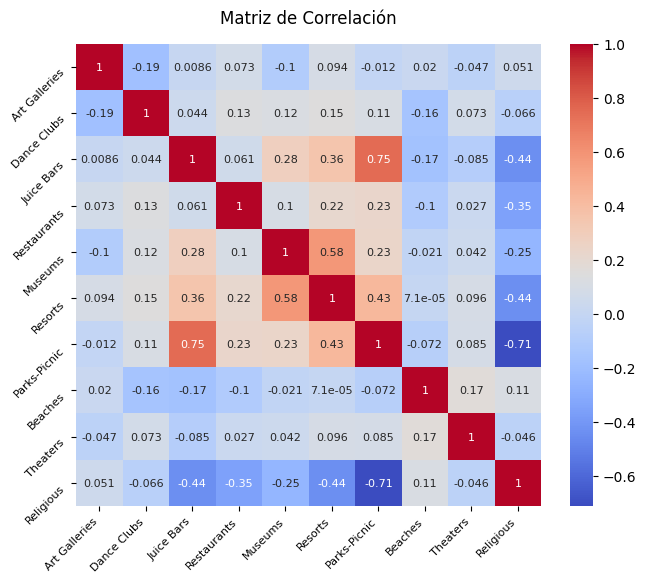

In [17]:
correlation = x.corr()

plt.figure(figsize=(7.5, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de Correlación', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)   # rotar los label a 45 grados y alinear su texto
plt.yticks(rotation=45, va='top', fontsize=8)     # rotar los label a 45 grados y alinear su texto
plt.show()

> 👁️‍🗨️ Pareciera haber:
  - Una fuerte correlación entre `Parks/Picnic` y `Juice Bars`.
  - Una fuerte correlación (en este caso negativa) entre `Parks/Picnic` y `Religious`.
  - Y tal vez una correlación entre `Resorts` y `Museums`.

## ✂️ Punto 3. **Preprocesamiento**


### 🎯 Consignas:

- Limpieza 1: manejen missing values (eliminar, imputar) y outliers (si es necesario).
- Limpieza 2: indique cuáles features descarta. Justifique.
- Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adecuado.
- El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

### 📝 Resolución:

👉🏻 Missing values ...

> 👁️‍🗨️ Por lo que investigué, el tratamiento de `nulos` y `duplicados` es mejor realizarlo como parte del Análisis Inicial de Datos (IDA), no tanto del Análisis Exploratorio de Datos (EDA).  

> 👁️‍🗨️ Es por ello, que esa parte de las consignas de preprocesamiento las resolví en el `Punto 1`, en lugar del `Punto 3`.  
Más información en la sección `Referencias`.

👉🏻 Tratamiento de **outliers** ...

> Del `Punto 2` observé que en el dataset existen 80 filas (un 8% del total) con al menos 1 outlier.

> Me parece que es mucho para eliminarnos de un plumazo...  
  Pero tal vez buscando filas que presenten **varios outliers** en simultáneo, el conteo pueda resultar bastante menor... de esa manera podría descartar usuarios muy "extremos", sin perder demasiada información en el camino.

In [18]:
# contar cuántos outliers tiene cada fila
outliers_per_row = outliers.sum(axis=1)

# buscar filas con 2+ outliers
outliers_extreme = outliers_per_row[outliers_per_row > 1]
print(f'Filas con 1+ outliers: { outliers_extreme.count() }')

Filas con 1+ outliers: 6


In [19]:
# filtrar a filas con hasta 1 outlier de máximo
x = x[outliers_per_row <= 1]
x.shape

(974, 10)

> 👁️‍🗨️ De esta manera descarto a los usuarios más "extremistas". Pero aceptando en el dataset a los que en hasta 1 aspecto (feature) puedan haber considerado una puntuación mayor a 3 sigmas.

👉🏻 **EDIT**: 🕗 un viaje en el tiempo

> Usando el `K-Means`, la métrica `Silhouette Score` me dió bastante baja.

> Recordando que `K-Means` (a diferencia de `DBSACN`) es muy sencible a los outliers, resolví volver a este punto y volé a los 80 outliers para probar si mejoraba... Sin embargo la mejora obtenida resultó completamente marginal. 😞

> Dejo el código original y el **edit** comentado por las dudas. 🤷🏻‍♂️

In [20]:
# filtrar a filas sin outliers
# x = x[outliers_per_row <= 0]
# x.shape

👉🏻 Descarte de features ...

> Del `Punto 2` observé que la feature `Restaurants` se encuentra sumamente desbalanceada, procedo a descartarla.

In [21]:
# el 'ignore errors' es por si se quiere ejecutar la celda más de 1 vez
x = x.drop('Restaurants', axis=1, errors='ignore')
x.head(3)

,Art Galleries,Dance Clubs,Juice Bars,Museums,Resorts,Parks-Picnic,Beaches,Theaters,Religious
0,0.93,1.8,2.29,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.24,1.54,3.18,2.80,1.31,2.50


👉🏻 Variables categóricas ...

In [22]:
# no aplica

👉🏻 Escalado de los features ...

- Como comenté en una de las observaciones durante el EDA, utilizaré `Estandarización` (no así normalización) ya que esta distribuye los datos en el cero +/- 1 desviación estandar. Lo cual resulta idóneo para algoritmos como `K-Means`.

In [23]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)   # estandarizacion

print(x_std[:5])                  # una muestra

[[ 0.1191  0.9675  1.6162 -0.3191  1.0735  1.1606 -0.3327  0.6833 -1.1876]
 [ 0.3974  1.8218  2.0858  1.1017  2.4891  3.718  -1.4975  0.793  -1.5   ]
 [ 1.0157 -1.1682 -0.6048 -1.6024 -0.5657 -0.1182 -0.2599 -0.7151 -0.9377]
 [-1.3649  0.9675 -0.922  -1.0983 -0.6029 -0.1182  0.905  -0.0022  0.1867]
 [-1.1794 -0.3139  0.2075  1.3767  0.3284 -0.1182 -0.4055 -1.0716 -0.8128]]


## 🧮 Punto 4. **Clustering**

En este apartado aplicará clustering sobre los datos obtenidos del Punto 3.

### 🎯 4.1 - K-Means

- Determine el número ideal de clústers usando `silhoutte score`.

- Aplique `k-means` sobre los datos procesados del grupo anterior.

### 📝 Resolución:

👉🏻 Buscando el número idea del clusters ...

Text(0.5, 0, 'Cantidad de clusters')

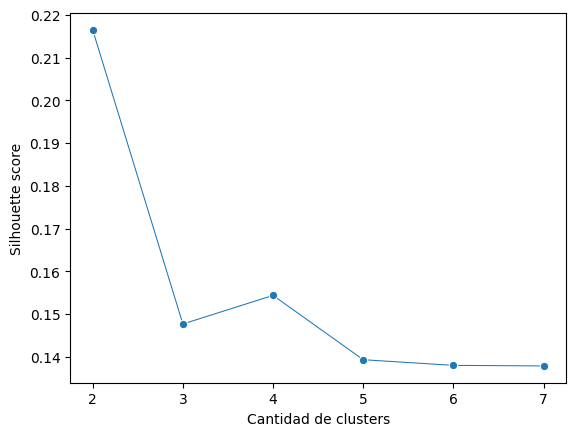

In [24]:
k_values = range(2, 8)
scores = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234) # 10 repeticiones
  kmeans.fit(x_std)

  score = silhouette_score(x_std, kmeans.labels_)
  scores.append(score)

sns.lineplot(x=k_values, y=scores, marker='o', size=33, legend=False)
plt.ylabel('Silhouette score', fontsize=10)
plt.xlabel('Cantidad de clusters', fontsize=10)

> 👁️‍🗨️ En la métrica `Silhouette Score` a más cerca de 1 mejor.

> 👁️‍🗨️ Observo que con un score cercano a `0.22`, resulta `K=2` ser la mejor opción, aunque se encuentra bastante distante de un clustering ideal.


👉🏻 Aplicando K-Means ...

In [25]:
# clustering con K-Means (2 clusters)
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans.fit(x_std)

labels = kmeans.labels_             # etiquetas
centroids = kmeans.cluster_centers_ # coordenadas de los centroides

### 🎯 4.2 - Análisis Intra-clúster

- Para el modelo de `k-means` con el valor de `k` (número de clústeres) ideal, analice los datos que pertenecen a cada clústers.

- ¿Cuáles son sus características/distribución? Puede usar gráficas como box-plots.

### 📝 Resolución:

In [26]:
# agregar a las observaciones originales sus labels correspondientes
x_with_labels = x.copy()
x_with_labels['Cluster'] = labels

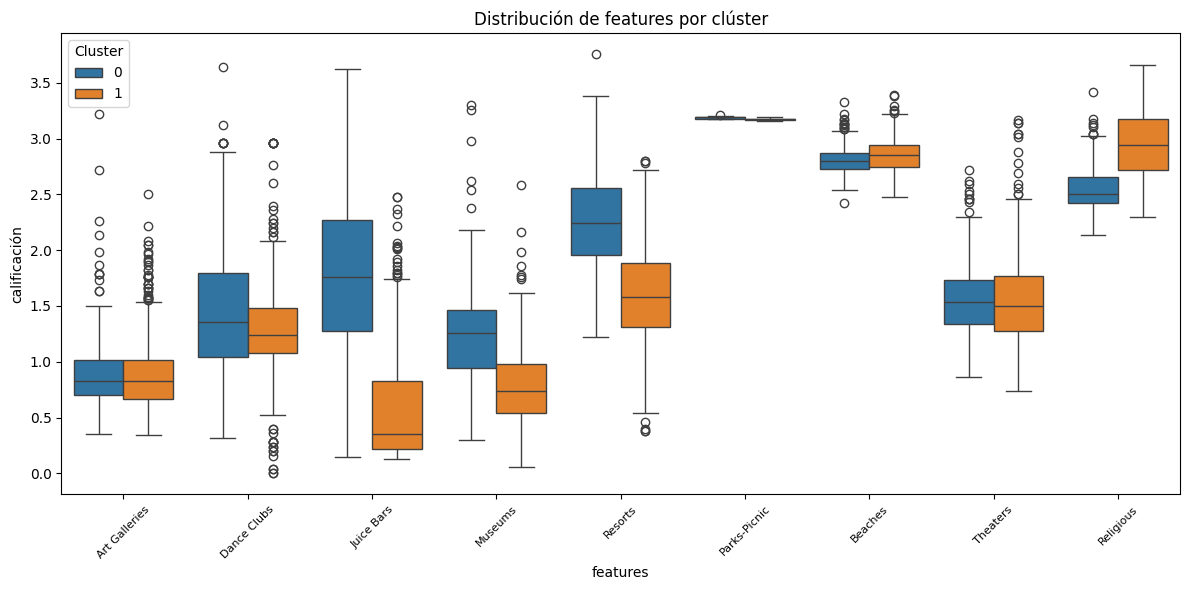

In [27]:
# para este gráfico le pedí ayuda a ChatGPT

# 'derretir' el dataframe para mostarlo con Seaborn
x_melted = x_with_labels.melt(id_vars='Cluster', var_name='features', value_name='calificación')

plt.figure(figsize=(12, 6))
sns.boxplot(x='features', y='calificación', hue='Cluster', data=x_melted)
plt.title('Distribución de features por clúster')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

> 👁️‍🗨️ En los features que separan bien los clústeres sus cajas serán dispares (ej. una caja mucho más alta vs otra más baja).  
Por el contrario si los boxplots se superponen mucho, puede indicar que ese feature no distingue bien entre los clústeres.

> 👁️‍🗨️ En este caso observo que `Dance Clubs`, `Juice Bars` y `Religious` son los features que mejor separan los datos.

> 👁️‍🗨️ Para la elaboración del gráfico y su interpretación le pedí ayuda a ChatGPT.

## 🪚 Punto 5. **Reducción de Dimensionalidad**

### 🎯 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

👉🏻 Aplicando PCA para reducir a 2 dimensiones ...

In [28]:
# PCA a 2 dimensiones
pca_2d = PCA(n_components=2)
x_pca_2d = pca_2d.fit_transform(x_std)

# porcentaje de la info original capturada en cada eje
explained_variance = pca_2d.explained_variance_ratio_
total_variance = explained_variance.sum()

print(f"Varianza explicada por PC1:    { round(explained_variance[0], 4) }")
print(f"Varianza explicada por PC2:    { round(explained_variance[1], 4) }")
print(f"Varianza total explicada (2D): { round(total_variance, 4) }")

Varianza explicada por PC1:    0.3189
Varianza explicada por PC2:    0.1404
Varianza total explicada (2D): 0.4593


> 👁️‍🗨️ Esto significa en un 46% de la información original está representada en estas 2 dimensiones.

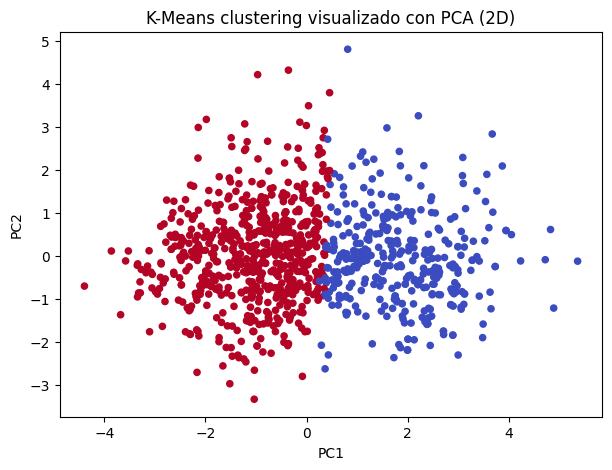

In [29]:
plt.figure(figsize=(7, 5))
plt.scatter(x_pca_2d[:, 0], x_pca_2d[:, 1], c=labels, cmap='coolwarm', s=20)
plt.title('K-Means clustering visualizado con PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

👉🏻 Aplicando PCA para reducir a 3 dimensiones ...

In [30]:
# PCA a 3 dimensiones
pca_3d = PCA(n_components=3)
x_pca_3d = pca_3d.fit_transform(x_std)

# porcentaje de la info original capturada en cada eje
explained_variance = pca_3d.explained_variance_ratio_
total_variance = explained_variance.sum()

print(f"Varianza explicada por PC1:    { round(explained_variance[0], 4) }")
print(f"Varianza explicada por PC2:    { round(explained_variance[1], 4) }")
print(f"Varianza explicada por PC3:    { round(explained_variance[2], 4) }")
print(f"Varianza total explicada (3D): { round(total_variance, 4) }")

Varianza explicada por PC1:    0.3189
Varianza explicada por PC2:    0.1404
Varianza explicada por PC3:    0.1359
Varianza total explicada (3D): 0.5952


> 👁️‍🗨️ Esto significa en un 60% de la información original está representada en estas 3 dimensiones.

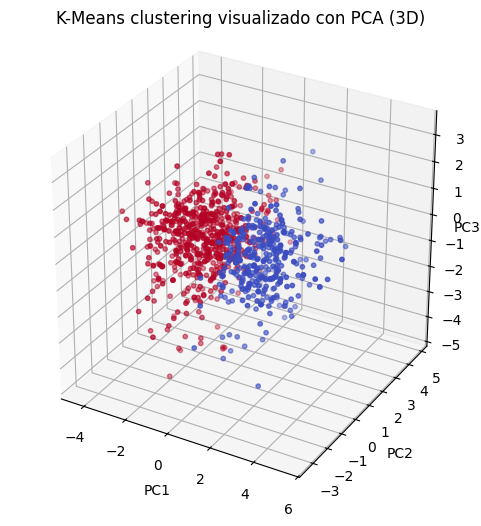

In [31]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
sc = ax.scatter(x_pca_3d[:, 0], x_pca_3d[:, 1], x_pca_3d[:, 2], c=labels, cmap='coolwarm', s=10)
ax.set_title('K-Means clustering visualizado con PCA (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', labelpad=-4)
plt.show()

> 👁️‍🗨️ Para la elaboración de los gráficos y su interpretación le pedí ayuda a ChatGPT.

### 🎯 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1.  
Realice los mismos pasos y análisis que realizó para el Punto 4, pero con este dataset reducido.

👉🏻 Buscando el número idea del clusters ...

Text(0.5, 0, 'Cantidad de clusters')

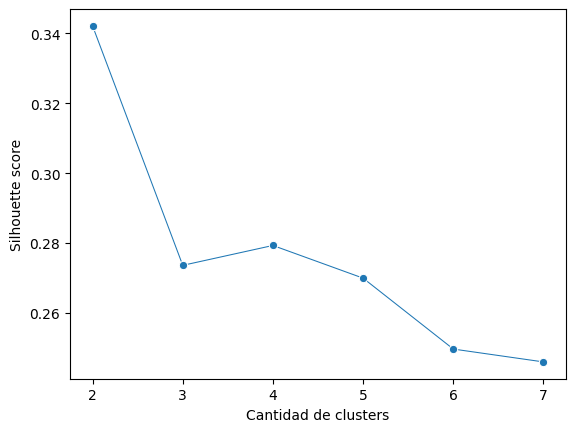

In [32]:
k_values = range(2, 8)
scores = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234) # 10 repeticiones
  kmeans.fit(x_pca_3d)

  score = silhouette_score(x_pca_3d, kmeans.labels_)
  scores.append(score)

sns.lineplot(x=k_values, y=scores, marker='o', size=33, legend=False)
plt.ylabel('Silhouette score', fontsize=10)
plt.xlabel('Cantidad de clusters', fontsize=10)

> 👁️‍🗨️ Vuelve a repetirse `K=2` como número ideal de clusters.

> 👁️‍🗨️ Observo que de un score original cercano a `0.22`, subió levemente a `0.35`  
(aunque también se encuentra bastante distante de un clustering ideal).

👉🏻 Aplicando K-Means ...

In [33]:
# clustering con K-Means (2 clusters)
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans.fit(x_pca_3d)

labels_3d = kmeans.labels_            # etiquetas
centroids = kmeans.cluster_centers_   # coordenadas de los centroides

In [34]:
# agregar a las observaciones sus labels correspondientes
x_pca_with_labels = pd.DataFrame(x_pca_3d, columns=['PC1', 'PC2', 'PC3'])
x_pca_with_labels['Cluster'] = labels_3d

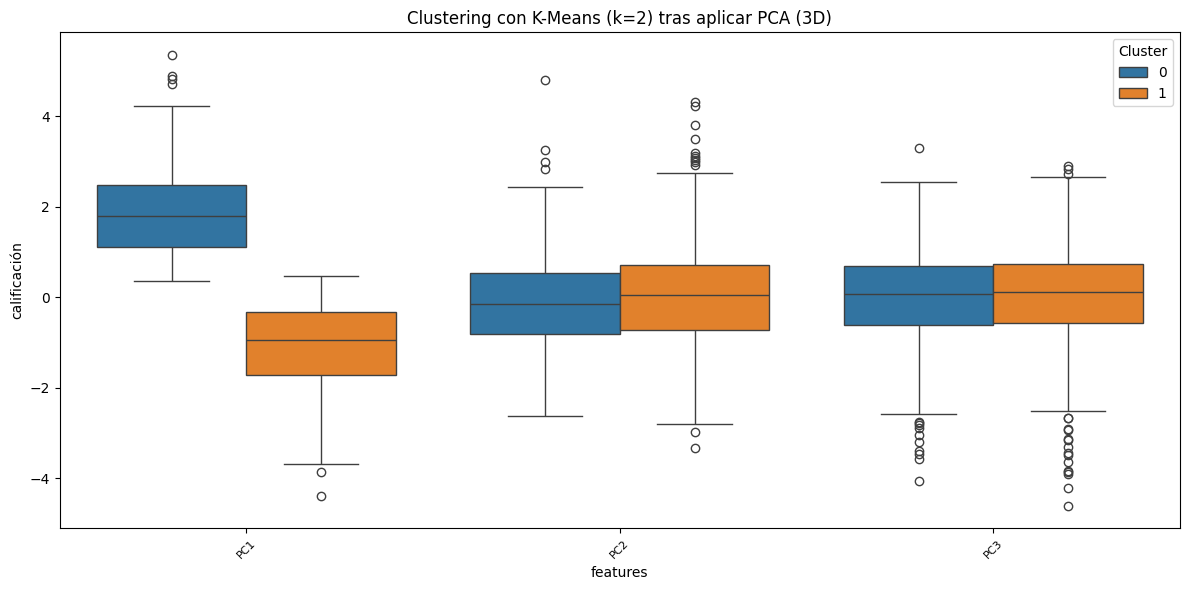

In [35]:
x_pca_melted = x_pca_with_labels.melt(id_vars='Cluster', var_name='features', value_name='calificación')

plt.figure(figsize=(12, 6))
sns.boxplot(x='features', y='calificación', hue='Cluster', data=x_pca_melted)
plt.title('Clustering con K-Means (k=2) tras aplicar PCA (3D)')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

> 👁️‍🗨️ En este caso es el eje principal `PC1` el que (obviamente) mejor separa los datos.

> 👁️‍🗨️ Ya desde las observaciones en el `Punto 5.1`, donde detallo las varianzas capturadas por cada eje, cabría esperar este comportamiento...
  - Varianza explicada por PC1:    0.3189
  - Varianza explicada por PC2:    0.1404
  - Varianza explicada por PC3:    0.1359

## 💡 Punto 6. **Conclusiones**

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿Los clústeres se corresponden con clases reales (si las hay)?
* ¿La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

### 📝 Conclusiones:

👉🏻 Correspondencia con clases reales ...

> 👁️‍🗨️ En este caso los features eran todas variables contínuas en un rango de `0`-`4` (calificaciones entre 5 estrellas posibles). Luego quedaron todos mezclados en los clusters.

👉🏻 La reducción de dimensionalidad ...

> 👁️‍🗨️ Por lo que observé, al menos para este caso, tuvo una leve mejora, pero bastante magra... medido en el `Silhouette Score` por ejemplo, apenas si subió de un `0.22` a `0.35`.

👉🏻 Adicionalmente ...

> 👁️‍🗨️ Quisiera descatar que aún probando (en un 2do intento) de eliminar a todos los outliers, esto no tuvo impacto sobre la calidad del clustering.  
Es lo que menciono en la sección 'EDIT: 🕗 un viaje en el tiempo' del `Punto 3`, donde recordando la alta sensibiliad del `K-Means` a los outliers, hice un tratamiento más agresivo de outliers, y volví a ejecutar todo nuevamente.  
Raro 🤷🏻‍♂️ ... será probar luego en el `Punto 7.1` con el `DBSCAN` y ver si con ese otro algoritmo mejora la calidad del clustering.

> 👁️‍🗨️ Luego de googlear por algunas pistas para diagnosticar que podría estar pasando... algo que me llamó la atención: puede que el dataset simplemente no tenga datos agrupables a clusters de forma esférica, y de ahí que se explique su bajo rendimiento en el `Silhouette Score`.

## ⭐ Punto 7. **Bonus**

Elija una de las siguientes consignas para resolver:

> 👉🏻 Realizaré el `Punto 7.1` ... aplicar `DBSCAN` a ambos datasets.

### 🎯 7.1 Aplicar DBSCAN sobre su dataset

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

👉🏻 Función auxiliar ...

Defino primeramente una función, que usando 2 bucles, pruebe distintos valores para los hiperparámetros `eps` y `min_samples`...  
A fin de buscar la mejor combinación posible. 💪🏻

In [36]:
def dbscan_explore(x, eps_values, min_samples_values):

  # cabecera de las estadísticas
  print('-' * 63)
  print(' eps | min_samples |  clusters | válidos |  ruido | silhouette ')
  print('-' * 63)

  # bucles sobre todas las combinaciones de 'eps' y 'min_samples'
  for eps in eps_values:
    for min_samples in min_samples_values:

      dbscan = DBSCAN(eps=eps, min_samples=min_samples)   # instanciar DBSCAN
      labels = dbscan.fit_predict(x_std)                  # entrenar

      # descartar el ruido (DBSCAN los marca como -1) previo al silhouette-score
      x_std_filtered = x_std[labels != -1]               # máscara de filtro (true/false)
      labels_filtered = labels[labels != -1]              # mascara de filtro (true/false)

      n_clusters = len(set(labels_filtered))
      n_valid = np.sum(labels != -1)
      n_noise = np.sum(labels == -1)

      # si se formaron al menos 2 clusters (el 1er cluster es el '-1' del ruido)
      if n_clusters > 1:

        # calcular el silhouette-score
        silhouette = silhouette_score(x_std_filtered, labels_filtered)

        # formatear las estadísticas
        eps_text = str(round(eps, 1)).rjust(4, ' ')
        min_samples_text = str(min_samples).rjust(11, ' ')
        n_clusters_text = str(n_clusters).rjust(9, ' ')
        n_valid_text = str(n_valid).rjust(7, ' ')
        n_noise_text = str(n_noise).rjust(6, ' ')
        silhouette_text = str(round(silhouette, 4)).rjust(10, ' ')

        # mostrar las estadísticas
        print(f"{ eps_text } | { min_samples_text } | { n_clusters_text } | { n_valid_text } | { n_noise_text } | { silhouette_text }")

👉🏻 Dataset completo ...

In [37]:
eps_values = np.arange(0.3, 1.1, 0.1)                   # rango de 0.3 a 1.0
min_samples_values = range(3, 8)                        # rango de 3 a 7

dbscan_explore(x_std, eps_values, min_samples_values)   # dataset 'x_std' (el original)

---------------------------------------------------------------
 eps | min_samples |  clusters | válidos |  ruido | silhouette 
---------------------------------------------------------------
 0.3 |           3 |         4 |      12 |    962 |     0.9748
 0.4 |           3 |         5 |      16 |    958 |     0.9564
 0.5 |           3 |         6 |      19 |    955 |     0.9217
 0.6 |           3 |         7 |      22 |    952 |     0.8802
 0.7 |           3 |        14 |      55 |    919 |     0.6736
 0.7 |           4 |         5 |      26 |    948 |     0.7193
 0.8 |           3 |        24 |     103 |    871 |     0.5921
 0.8 |           4 |         7 |      46 |    928 |     0.6225
 0.8 |           5 |         5 |      37 |    937 |     0.6704
 0.8 |           6 |         3 |      22 |    952 |     0.5112
 0.8 |           7 |         2 |      18 |    956 |     0.7451
 0.9 |           3 |        37 |     183 |    791 |     0.4312
 0.9 |           4 |        15 |      98 |    876 | 

> 👁️‍🗨️ ¡Ahora sí! ... a diferencia de K-Means, con **DBSCAN** se logró un clustering algo mejor ...

> 👁️‍🗨️ Utilizando `eps=0.3` y `min_samples=3`, agrupa los datos en `4 clusters`, alcanzando un `silhouette score` de `0.9748`  
Sin embargo esta combinación de hiperparámetros es engañoza, ya que engloba solamente a `12 observaciones`.

> 👁️‍🗨️ No obstante, si se está dispuesto a aceptar la formación de `24 clusters` 😱, utilizando un `eps=0.8` y `min_samples=3`, se logra incluir `103 observaciones` al clustering, con un `silhouette score` de `0.5921`, algo más aceptable que el `0.22` previo de `k-means`. Sí, lo sé, es un promedio de solamente 4.29 observaciones por cluster, pero entiendo que aún así, sería una mejor agrupación que antes.

👉🏻 Dataset reducido a 3D ...

In [38]:
eps_values = np.arange(0.3, 1.1, 0.1)                     # rango de 0.3 a 1.0
min_samples_values = range(3, 8)                          # rango de 3 a 7

dbscan_explore(x_pca_3d, eps_values, min_samples_values)  # dataset 'x_pca_3d'

---------------------------------------------------------------
 eps | min_samples |  clusters | válidos |  ruido | silhouette 
---------------------------------------------------------------
 0.3 |           3 |         4 |      12 |    962 |     0.9748
 0.4 |           3 |         5 |      16 |    958 |     0.9564
 0.5 |           3 |         6 |      19 |    955 |     0.9217
 0.6 |           3 |         7 |      22 |    952 |     0.8802
 0.7 |           3 |        14 |      55 |    919 |     0.6736
 0.7 |           4 |         5 |      26 |    948 |     0.7193
 0.8 |           3 |        24 |     103 |    871 |     0.5921
 0.8 |           4 |         7 |      46 |    928 |     0.6225
 0.8 |           5 |         5 |      37 |    937 |     0.6704
 0.8 |           6 |         3 |      22 |    952 |     0.5112
 0.8 |           7 |         2 |      18 |    956 |     0.7451
 0.9 |           3 |        37 |     183 |    791 |     0.4312
 0.9 |           4 |        15 |      98 |    876 | 

> 👁️‍🗨️ Aplicando `DBSCAN` sobre el dataset reducido a 3D, se logran los mismos resultados que con el dataset original.

> 👁️‍🗨️ Utilizando `eps=0.8` y `min_samples=3`, agrupa los datos en `24 clusters` que incluyen `103 observaciones`, y alcanzando un `silhouette score` de `0.5921`.

👉🏻 Aplico DBSCAN sobre el dataset original, usando la mejor combinación de hiperparámetros encontrada ...

In [39]:
dbscan = DBSCAN(eps=0.8, min_samples=3)     # instanciar DBSCAN
labels = dbscan.fit_predict(x_std)          # entrenar sobre el dataset original
print(labels[:300], '\n')                   # una muestra de las etiquetas

x_pca_3d_with_labels = pd.DataFrame(x_pca_3d, columns=['PC1', 'PC2', 'PC3'])
x_pca_3d_with_labels['Cluster'] = labels    # le adjunto las nuevas etiquetas

[-1 -1 -1 -1 -1 -1  0 -1  5 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1  3
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 17 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 23 -1 -1  4 -1
 17 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1
 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 10 -1 -1 -1 -1 -1 -1  7  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1  9 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 11 -1 -1 -1 12 -1 -1 -1 -1 -1 -1 -1 13 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 12 -1 -1 -1 13 -1 -1 -1 -1 -1 -1 -1 -1 12 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 14 -1 -1 -1 -1  6 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 15 -1 -1 -1 -1 16 -1 -1 -1 -1 -1 -1 -1 -1 17 -1 -1 -1 -1 18] 



👉🏻 El objetivo, es luego visualizar los nuevos clusters en 3D ...

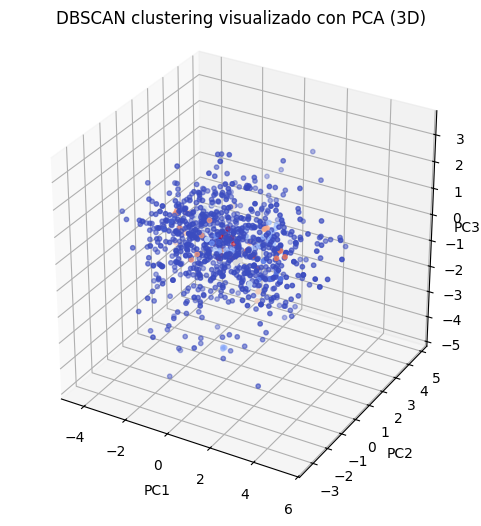

In [40]:
# por comodidad, separo las columnas del dataframe en variables
PC1, PC2, PC3 = x_pca_3d_with_labels['PC1'], x_pca_3d_with_labels['PC2'], x_pca_3d_with_labels['PC3']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
sc = ax.scatter(PC1, PC2, PC3, c=labels, cmap='coolwarm', s=10)
ax.set_title('DBSCAN clustering visualizado con PCA (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', labelpad=-4)
plt.show()

> 👁️‍🗨️ Sep, mi clustering es puro ruido. 😬

👉🏻 Ultima visualización: en este caso, descartando primeramente el ruido ...

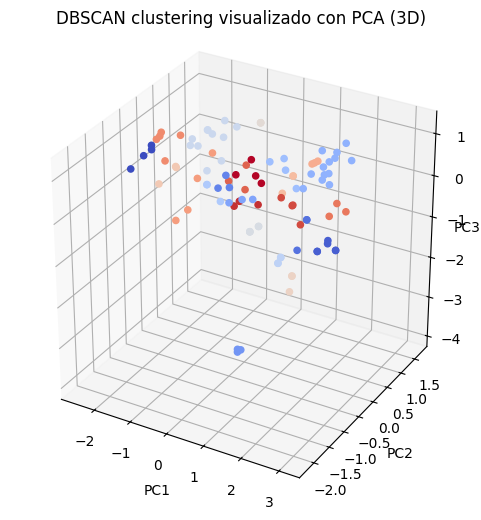

In [41]:
clean_x_pca_3d_with_labels = x_pca_3d_with_labels[labels != -1]
clean_labels = labels[labels != -1]

PC1, PC2, PC3 = clean_x_pca_3d_with_labels['PC1'], clean_x_pca_3d_with_labels['PC2'], clean_x_pca_3d_with_labels['PC3']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
sc = ax.scatter(PC1, PC2, PC3, c=clean_labels, cmap='coolwarm', s=20, alpha=1)
ax.set_title('DBSCAN clustering visualizado con PCA (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', labelpad=-4)
plt.show()

### 🎯 7.2 Análisis de Outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

In [42]:
# no aplica

## 📚 **Referencias**

- Dataset: 'Travel Reviews' (TripAdvisor)  
  https://archive.ics.uci.edu/dataset/484/travel+reviews

- Notebook previa: 'Trabajo Práctico 01 - Regresión Lineal' (carga de datos, inspección inicial, preprocesamiento y EDA).  
  https://colab.research.google.com/drive/1sOalKDoZxMFLHJINrjSWUHcmE29pMsl-#scrollTo=P4CB1AzdIKqt

- Workflow: Análisis Inicial de Datos (IDA) + Análisis Exploratorio de Datos (EDA)  
  https://millev.com/analisis-exploratorio-de-datos-2/

- Debilidad del K-means ante datos que no presenten clusters de forma esférica  
  https://medium.com/@kadambaripatel79/understanding-the-limitations-of-k-means-clustering-1fb5335f7859

- Notebooks de la materia: vistas en clase y del campus virtual.